In [1]:
import json
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

# Path to the JSON file
combined_dataset_path = "/kaggle/input/combined-landscape-captions/combined_landscape_captions.json"

# Load the dataset
with open(combined_dataset_path, "r") as f:
    image_caption_pairs = json.load(f)

# Display the total number of samples
print(f"Total samples: {len(image_caption_pairs)}")


Total samples: 14319


In [2]:
class LandscapeDataset(Dataset):
    def __init__(self, image_caption_pairs, transform=None):
        self.image_caption_pairs = list(image_caption_pairs.items())
        self.transform = transform

    def __len__(self):
        return len(self.image_caption_pairs)

    def __getitem__(self, idx):
        image_path, caption = self.image_caption_pairs[idx]
        image = Image.open(image_path).convert("RGB")
        
        if self.transform:
            image = self.transform(image)
        
        return image, caption

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images
    transforms.ToTensor(),         # Convert to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

# Create the dataset
dataset = LandscapeDataset(image_caption_pairs, transform=transform)

# Create a DataLoader
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# Check a batch
for images, captions in dataloader:
    print("Batch of images:", images.shape)
    print("Batch of captions:", captions)
    break


Batch of images: torch.Size([16, 3, 224, 224])
Batch of captions: ('a body of water', 'the painted hills in the painted hills area of painted hills state park', 'icebergs in the arctic sea', 'a person sitting on a rock', 'a waterfall in the middle of a forest', 'a forest with a sunbeam in the background', 'a dirt road leading to a stone wall', 'the cliffs of the jurassic coast at sunset', 'the cover of the book, the book of the desert', 'a small house in the middle of a lake', 'a small lake in the mountains', 'a field of corn', 'the sky is pink', 'a long straight road', 'a large sandy area', 'a rock covered in moss')


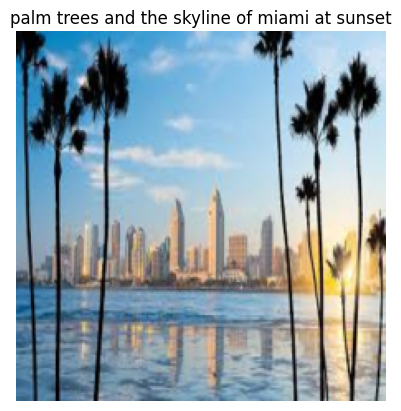

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Function to denormalize and convert tensor to image
def show_image(tensor, caption):
    # Reverse the normalization: (value * std) + mean
    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    image = tensor.permute(1, 2, 0).numpy()  # Change to HxWxC format
    image = (image * std) + mean  # Denormalize
    image = np.clip(image, 0, 1)  # Clip values to [0, 1]
    
    # Display the image and caption
    plt.imshow(image)
    plt.axis("off")
    plt.title(caption)
    plt.show()

# Get a single image and caption
image, caption = dataset[0]  # Index to pick an example
show_image(image, caption)
